# Introduction

The goal of this tutorial is to walk you through some of the core modules used in Python for data analysis.  We're going to run through a simple example to get everyone on the same page.

## Jupyter

This document is a Jupyter Notebook, a tool for interactively running code interspersed with text and output.  You can create notebooks in a number of different programming languages like Python, R, or Julia.  Let's take a basic example using Python:

In [1]:
print("hello world")

hello world


You can modify the print statement above and rerun the corresponding "cell" to have it print whatever you want.

Jupyter notebooks are great for classes like this because you can run through the examples on your own machine with me live.

Before we get started, we're going to need to import a series of modules or libraries that will be used throughout the rest of the tutorial.  Modules are collections of pre-defined Python functions (and other objects) which you can use in your scripts.  Whereas libraries are larger collections of modules -- we'll mostly be dealing with libraries here though the distinction isn't important.

We import libraries as follows:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

It is also possible to import particular functions from a given module, for instance:

In [3]:
from numpy.linalg import norm

X = np.random.normal(size=(10, 10))
norm(X)

10.614043742882727

# Pandas

To start, we're going to spend most of our time using the module pandas.  Pandas is a data analysis library that contains many of the tools you'll want to use to work with data in Python.  Let's start by working with some real data:

## DataFrames

A dataframe is one of the core objects used in pandas.  It is essentially a matrix with additional metadata associated with the rows and columns.  For instance, the dataframe might have an index which corresponds to days of the week, while each column corresponds to a different assets returns.

One great thing about pandas is how easy it is to load data into Python.  You can even load data from the web, for instance lets use the following command to load a dataframe I've posted to github:

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/lbybee/pytutorial/master/49_ind_portfolios.csv")
df

,date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,20200102,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
1,20200103,-0.0100,0.0041,-0.0055,-0.0001,0.0020,-0.0007,-0.0102,-0.0016,-0.0058,...,-0.0025,-0.0068,-0.0083,-0.0078,-0.0049,-0.0117,-0.0058,-0.0050,-0.0078,-0.0067
2,20200106,-0.0052,-0.0009,-0.0002,0.0045,0.0085,0.0169,0.0144,-0.0018,0.0021,...,-0.0121,-0.0047,-0.0011,0.0065,0.0001,-0.0033,0.0054,-0.0043,0.0019,0.0035
3,20200107,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
4,20200108,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,20200624,-0.0435,-0.0161,-0.0235,-0.0199,-0.0208,-0.0361,-0.0323,-0.0294,-0.0157,...,-0.0269,-0.0350,-0.0338,-0.0141,-0.0232,-0.0412,-0.0326,-0.0529,-0.0332,-0.0270
121,20200625,0.0074,0.0045,0.0079,0.0096,0.0073,0.0016,0.0080,0.0113,0.0092,...,0.0035,0.0100,0.0076,0.0034,-0.0032,0.0283,0.0217,0.0204,0.0230,0.0125
122,20200626,-0.0104,-0.0196,-0.0278,-0.0199,-0.0301,-0.0069,-0.0454,-0.0134,-0.0193,...,-0.0119,-0.0256,-0.0186,-0.0179,-0.0221,-0.0486,-0.0268,-0.0314,-0.0421,-0.0194
123,20200629,0.0122,0.0150,0.0180,0.0201,0.0253,0.0048,0.0183,0.0208,0.0208,...,0.0259,0.0265,0.0294,0.0078,0.0262,0.0164,0.0142,0.0262,0.0120,0.0155


What I've done is imported a csv table into a dataframe from the internet!  You can do a lot more than this with pandas.  It can work with many data files, I'd encourage you to check out all the IO options here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Now, what do we have in terms of data?

These are daily returns for a series of industry portfolios taken from Kenneth French's website:

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

The first column is the date and the remaining columns are each portfolios returns.

How to I work with this dataframe?

I can access each column as follows:

# Indexing

## indexing by [ ]

### indexing columns

In [5]:
df["Agric"]

0     -0.0251
1     -0.0100
2     -0.0052
3      0.0021
4      0.0052
        ...  
120   -0.0435
121    0.0074
122   -0.0104
123    0.0122
124    0.0218
Name: Agric, Length: 125, dtype: float64

In [6]:
df[["Agric"]]

,Agric
0,-0.0251
1,-0.0100
2,-0.0052
3,0.0021
4,0.0052
...,...
120,-0.0435
121,0.0074
122,-0.0104
123,0.0122


Pay attention to the returned object, series or dataframe

We can pass in a list of column names as well to locate multiple columns

In [7]:
df[["Agric", "Food"]]

,Agric,Food
0,-0.0251,-0.0144
1,-0.0100,0.0041
2,-0.0052,-0.0009
3,0.0021,-0.0076
4,0.0052,-0.0017
...,...,...
120,-0.0435,-0.0161
121,0.0074,0.0045
122,-0.0104,-0.0196
123,0.0122,0.0150


### indexing rows

In [8]:
df[120:]

,date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
120,20200624,-0.0435,-0.0161,-0.0235,-0.0199,-0.0208,-0.0361,-0.0323,-0.0294,-0.0157,...,-0.0269,-0.0350,-0.0338,-0.0141,-0.0232,-0.0412,-0.0326,-0.0529,-0.0332,-0.0270
121,20200625,0.0074,0.0045,0.0079,0.0096,0.0073,0.0016,0.0080,0.0113,0.0092,...,0.0035,0.0100,0.0076,0.0034,-0.0032,0.0283,0.0217,0.0204,0.0230,0.0125
122,20200626,-0.0104,-0.0196,-0.0278,-0.0199,-0.0301,-0.0069,-0.0454,-0.0134,-0.0193,...,-0.0119,-0.0256,-0.0186,-0.0179,-0.0221,-0.0486,-0.0268,-0.0314,-0.0421,-0.0194
123,20200629,0.0122,0.0150,0.0180,0.0201,0.0253,0.0048,0.0183,0.0208,0.0208,...,0.0259,0.0265,0.0294,0.0078,0.0262,0.0164,0.0142,0.0262,0.0120,0.0155
124,20200630,0.0218,0.0107,0.0064,0.0065,-0.0036,0.0105,0.0146,0.0030,0.0139,...,0.0150,0.0171,0.0148,0.0172,0.0025,0.0142,0.0177,0.0199,0.0194,0.0094


### two-way indexing

In [9]:
df[["Agric", "Food"]][120:]

,Agric,Food
120,-0.0435,-0.0161
121,0.0074,0.0045
122,-0.0104,-0.0196
123,0.0122,0.0150
124,0.0218,0.0107


However, [ ] can't do slice index with str object.

In [10]:
df["date":"Soda"]

TypeError: cannot do slice indexing on RangeIndex with these indexers [date] of type str

In [11]:
df[["date","Food","Soda"]]

,date,Food,Soda
0,20200102,-0.0144,-0.0058
1,20200103,0.0041,-0.0055
2,20200106,-0.0009,-0.0002
3,20200107,-0.0076,-0.0064
4,20200108,-0.0017,0.0019
...,...,...,...
120,20200624,-0.0161,-0.0235
121,20200625,0.0045,0.0079
122,20200626,-0.0196,-0.0278
123,20200629,0.0150,0.0180


In [12]:
df.columns[0:4]

Index(['date', 'Agric', 'Food', 'Soda'], dtype='object')

In [13]:
df[df.columns[0:4]]

,date,Agric,Food,Soda
0,20200102,-0.0251,-0.0144,-0.0058
1,20200103,-0.0100,0.0041,-0.0055
2,20200106,-0.0052,-0.0009,-0.0002
3,20200107,0.0021,-0.0076,-0.0064
4,20200108,0.0052,-0.0017,0.0019
...,...,...,...,...
120,20200624,-0.0435,-0.0161,-0.0235
121,20200625,0.0074,0.0045,0.0079
122,20200626,-0.0104,-0.0196,-0.0278
123,20200629,0.0122,0.0150,0.0180


However, this can be done in a more simple and systematic way with iloc, indexing by position, introduced below.

[ ] is not recommended unless you are only extracting simple columns, as it may cause confusion. Further, there's also some low-level mechanism problem, like data alignment.

## indexing by label

.loc is primarily label based

### single label

In [14]:
df.loc[1,"Agric"]

-0.01

In [15]:
df.loc[:,"Agric"]

0     -0.0251
1     -0.0100
2     -0.0052
3      0.0021
4      0.0052
        ...  
120   -0.0435
121    0.0074
122   -0.0104
123    0.0122
124    0.0218
Name: Agric, Length: 125, dtype: float64

This returns a __series__, which is just a column from a dataframe.  I can also look at multiple columns at once:

In [16]:
df.loc[:,["Agric"]]

,Agric
0,-0.0251
1,-0.0100
2,-0.0052
3,0.0021
4,0.0052
...,...
120,-0.0435
121,0.0074
122,-0.0104
123,0.0122


This returns a dataframe if we pass in a list of column name(s)

Note that we must also specify the index for row

In [17]:
df.loc["Agric"]

KeyError: 'Agric'

### list of labels

In [18]:
df.loc[:,["Agric","Food","Soda"]]

,Agric,Food,Soda
0,-0.0251,-0.0144,-0.0058
1,-0.0100,0.0041,-0.0055
2,-0.0052,-0.0009,-0.0002
3,0.0021,-0.0076,-0.0064
4,0.0052,-0.0017,0.0019
...,...,...,...
120,-0.0435,-0.0161,-0.0235
121,0.0074,0.0045,0.0079
122,-0.0104,-0.0196,-0.0278
123,0.0122,0.0150,0.0180


### a slicing object

In [19]:
df.loc[:,"Agric":"Soda"]

,Agric,Food,Soda
0,-0.0251,-0.0144,-0.0058
1,-0.0100,0.0041,-0.0055
2,-0.0052,-0.0009,-0.0002
3,0.0021,-0.0076,-0.0064
4,0.0052,-0.0017,0.0019
...,...,...,...
120,-0.0435,-0.0161,-0.0235
121,0.0074,0.0045,0.0079
122,-0.0104,-0.0196,-0.0278
123,0.0122,0.0150,0.0180


## a boolean object

In [20]:
idx = df.loc[:,"date"]
idx 

0      20200102
1      20200103
2      20200106
3      20200107
4      20200108
         ...   
120    20200624
121    20200625
122    20200626
123    20200629
124    20200630
Name: date, Length: 125, dtype: int64

In [21]:
idx>20200531

0      False
1      False
2      False
3      False
4      False
       ...  
120     True
121     True
122     True
123     True
124     True
Name: date, Length: 125, dtype: bool

In [22]:
df.loc[idx>20200531,"date":"Soda"]

,date,Agric,Food,Soda
103,20200601,-0.0151,0.0078,0.0071
104,20200602,0.0390,0.0019,-0.0030
105,20200603,0.0155,-0.0103,0.0187
106,20200604,0.0501,-0.0024,-0.0032
107,20200605,0.0206,0.0159,0.0235
108,20200608,-0.0153,0.0251,0.0091
109,20200609,-0.0166,-0.0133,-0.0143
110,20200610,-0.0184,-0.0057,-0.0066
111,20200611,-0.0727,-0.0429,-0.0594
112,20200612,0.0156,0.0048,0.0104


In [23]:
df.loc[df["Agric"] > 0,:].head(5)

,date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
3,20200107,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
4,20200108,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
5,20200109,0.0013,-0.0005,0.0164,0.0029,0.0056,-0.0026,-0.0018,-0.0154,0.0106,...,0.0145,0.0025,0.0029,0.0061,0.0086,0.0055,0.0027,0.0058,0.0097,0.0082
7,20200113,0.0092,0.0119,0.0102,0.0118,0.0068,0.0285,0.0208,0.0117,0.0077,...,0.0170,0.0085,0.0004,0.0018,0.0011,0.0072,-0.0089,0.0063,0.0100,0.0132
8,20200114,0.0007,-0.0015,-0.0018,0.0050,-0.0008,0.0028,0.0044,0.0152,0.0002,...,-0.0049,0.0098,0.0063,-0.0024,0.0017,-0.0013,-0.0001,-0.0020,-0.0047,-0.0038


## Indexing by location

In [24]:
df.iloc[1,2]

0.0040999999999999

In [25]:
df.iloc[1:6,2:5]

,Food,Soda,Beer
1,0.0041,-0.0055,-0.0001
2,-0.0009,-0.0002,0.0045
3,-0.0076,-0.0064,-0.0164
4,-0.0017,0.0019,0.0093
5,-0.0005,0.0164,0.0029


iloc[a:b,i:j] locates rows from a to b-1 and columns from i to j-1

Can also pass in list of locations

In [26]:
df.iloc[[1,6],2:5]

,Food,Soda,Beer
1,0.0041,-0.0055,-0.0001
6,0.0049,0.0050,-0.0053


## Setting index

In [27]:
df_ts = df.set_index("date")

In [28]:
df_ts.index = pd.to_datetime(df_ts.index,format = "%Y%m%d")
df_ts

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,0.0063,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
2020-01-03,-0.0100,0.0041,-0.0055,-0.0001,0.0020,-0.0007,-0.0102,-0.0016,-0.0058,-0.0029,...,-0.0025,-0.0068,-0.0083,-0.0078,-0.0049,-0.0117,-0.0058,-0.0050,-0.0078,-0.0067
2020-01-06,-0.0052,-0.0009,-0.0002,0.0045,0.0085,0.0169,0.0144,-0.0018,0.0021,0.0007,...,-0.0121,-0.0047,-0.0011,0.0065,0.0001,-0.0033,0.0054,-0.0043,0.0019,0.0035
2020-01-07,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,-0.0022,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
2020-01-08,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,-0.0005,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.0435,-0.0161,-0.0235,-0.0199,-0.0208,-0.0361,-0.0323,-0.0294,-0.0157,-0.0282,...,-0.0269,-0.0350,-0.0338,-0.0141,-0.0232,-0.0412,-0.0326,-0.0529,-0.0332,-0.0270
2020-06-25,0.0074,0.0045,0.0079,0.0096,0.0073,0.0016,0.0080,0.0113,0.0092,0.0070,...,0.0035,0.0100,0.0076,0.0034,-0.0032,0.0283,0.0217,0.0204,0.0230,0.0125
2020-06-26,-0.0104,-0.0196,-0.0278,-0.0199,-0.0301,-0.0069,-0.0454,-0.0134,-0.0193,-0.0513,...,-0.0119,-0.0256,-0.0186,-0.0179,-0.0221,-0.0486,-0.0268,-0.0314,-0.0421,-0.0194


This allows us to do more operations on our dataframe that are based on index, like window operations.

## If you're interested in checking out more about indexing I'd recommend the pandas doc:

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

# Numpy

Pandas is built on top of numpy.

numpy is the core library used for linear algebra in Python and has many tools you'll end up using throughout the class.

The dataframe above is really just a wrapper around numpy, and I can access the raw values if I want:

In [29]:
df["Agric"].values

array([-0.0251, -0.01  , -0.0052,  0.0021,  0.0052,  0.0013, -0.0103,
        0.0092,  0.0007,  0.0016,  0.0181, -0.0265, -0.0156,  0.0083,
        0.0094, -0.0166, -0.0254,  0.0117,  0.0044,  0.0441, -0.0119,
        0.0374,  0.024 ,  0.0221, -0.0042, -0.0163, -0.0102, -0.0017,
        0.0113, -0.0083,  0.0017,  0.0191,  0.0023,  0.003 , -0.0104,
       -0.0175, -0.0659,  0.0004, -0.0386, -0.0066,  0.0423, -0.0114,
        0.0332, -0.0488, -0.0627, -0.0843,  0.1061, -0.0403, -0.1066,
        0.1073, -0.1449,  0.0858, -0.0598,  0.076 , -0.0231, -0.0275,
        0.0239,  0.0431,  0.0381, -0.0326,  0.033 , -0.0157, -0.0478,
       -0.0163,  0.0125,  0.0655,  0.0037,  0.0585,  0.0634, -0.0417,
       -0.0037, -0.0324, -0.0107,  0.0148, -0.031 , -0.0141,  0.0276,
        0.0169,  0.0295, -0.0129,  0.0221,  0.0354, -0.0359, -0.0222,
       -0.0005,  0.021 , -0.0366,  0.0461, -0.0079, -0.0538, -0.038 ,
       -0.0059,  0.0076, -0.0143,  0.0497, -0.0042,  0.0428, -0.0162,
       -0.0009,  0.0

I can do many linear algebra operations on the dataframe itself, and these will behave you would expect:

In [30]:
df.loc[:,"Agric":"Beer"].T.dot(df["Agric"])

Agric    0.169368
Food     0.075034
Soda     0.087186
Beer     0.093377
dtype: float64

What I've done here is taken the dot product between a series of columns, "Agric", "Food", "Soda", and "Beer", with the column "Agric".

# Data Operations

I can do many standard transformations using numpy to my dataframe and they'll behave as you expect:

## Summary stats

In [31]:
df.loc[:,"Agric":"Beer"].describe()

,Agric,Food,Soda,Beer
count,125.000000,125.000000,125.000000,125.000000
mean,-0.000109,-0.000056,-0.000822,0.000115
std,0.036958,0.022799,0.027171,0.029545
min,-0.144900,-0.087400,-0.092700,-0.112800
25%,-0.016600,-0.008800,-0.010800,-0.010400
50%,-0.000500,-0.000500,-0.001400,0.002900
75%,0.020600,0.007700,0.010000,0.008300
max,0.107300,0.090700,0.065400,0.114600


In [32]:
df.loc[:,"Agric":"Beer"].mean()

Agric   -0.000109
Food    -0.000056
Soda    -0.000822
Beer     0.000115
dtype: float64

In [33]:
df.loc[:,"Agric":"Beer"].cov()

,Agric,Food,Soda,Beer
Agric,0.001366,0.000605,0.000703,0.000753
Food,0.000605,0.000520,0.000517,0.000618
Soda,0.000703,0.000517,0.000738,0.000699
Beer,0.000753,0.000618,0.000699,0.000873


## Broadcast using numpy functions

In [34]:
np.square(df[["Agric", "Food"]])

,Agric,Food
0,0.000630,2.073600e-04
1,0.000100,1.681000e-05
2,0.000027,8.100000e-07
3,0.000004,5.776000e-05
4,0.000027,2.890000e-06
...,...,...
120,0.001892,2.592100e-04
121,0.000055,2.025000e-05
122,0.000108,3.841600e-04
123,0.000149,2.250000e-04


## Windowing Operations

In [35]:
df[["Agric"]].cumsum()

,Agric
0,-0.0251
1,-0.0351
2,-0.0403
3,-0.0382
4,-0.0330
...,...
120,-0.0446
121,-0.0372
122,-0.0476
123,-0.0354


In [36]:
(df[["Agric"]]+1).cumprod() - 1

,Agric
0,-0.025100
1,-0.034849
2,-0.039868
3,-0.037852
4,-0.032848
...,...
120,-0.121667
121,-0.115167
122,-0.124369
123,-0.113687


In [37]:
cumret = np.log(df[["Agric"]]+1).cumsum()
cumret

,Agric
0,-0.025420
1,-0.035471
2,-0.040684
3,-0.038586
4,-0.033400
...,...
120,-0.129729
121,-0.122356
122,-0.132811
123,-0.120685


In [38]:
np.exp(cumret)-1

,Agric
0,-0.025100
1,-0.034849
2,-0.039868
3,-0.037852
4,-0.032848
...,...
120,-0.121667
121,-0.115167
122,-0.124369
123,-0.113687


### Rolling windows, expanding, EMW
https://pandas.pydata.org/docs/user_guide/window.html

In [39]:
df_ts = df.set_index("date")

In [40]:
df_ts.index = pd.to_datetime(df_ts.index,format = "%Y%m%d")
df_ts

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,0.0063,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
2020-01-03,-0.0100,0.0041,-0.0055,-0.0001,0.0020,-0.0007,-0.0102,-0.0016,-0.0058,-0.0029,...,-0.0025,-0.0068,-0.0083,-0.0078,-0.0049,-0.0117,-0.0058,-0.0050,-0.0078,-0.0067
2020-01-06,-0.0052,-0.0009,-0.0002,0.0045,0.0085,0.0169,0.0144,-0.0018,0.0021,0.0007,...,-0.0121,-0.0047,-0.0011,0.0065,0.0001,-0.0033,0.0054,-0.0043,0.0019,0.0035
2020-01-07,0.0021,-0.0076,-0.0064,-0.0164,0.0005,-0.0207,-0.0064,-0.0014,-0.0071,-0.0022,...,-0.0070,0.0041,-0.0019,-0.0021,-0.0038,-0.0077,-0.0048,-0.0046,0.0017,-0.0032
2020-01-08,0.0052,-0.0017,0.0019,0.0093,0.0154,-0.0041,0.0136,0.0008,0.0059,-0.0005,...,0.0044,0.0099,0.0047,-0.0026,0.0107,0.0094,0.0108,-0.0047,0.0040,-0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.0435,-0.0161,-0.0235,-0.0199,-0.0208,-0.0361,-0.0323,-0.0294,-0.0157,-0.0282,...,-0.0269,-0.0350,-0.0338,-0.0141,-0.0232,-0.0412,-0.0326,-0.0529,-0.0332,-0.0270
2020-06-25,0.0074,0.0045,0.0079,0.0096,0.0073,0.0016,0.0080,0.0113,0.0092,0.0070,...,0.0035,0.0100,0.0076,0.0034,-0.0032,0.0283,0.0217,0.0204,0.0230,0.0125
2020-06-26,-0.0104,-0.0196,-0.0278,-0.0199,-0.0301,-0.0069,-0.0454,-0.0134,-0.0193,-0.0513,...,-0.0119,-0.0256,-0.0186,-0.0179,-0.0221,-0.0486,-0.0268,-0.0314,-0.0421,-0.0194


In [41]:
df_ts.rolling(window="5D").mean().head(10)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.025100,-0.014400,-0.005800,-0.006300,-0.004800,0.004600,0.016600,0.006300,-0.009500,0.006300,...,-0.007300,0.012200,0.002800,0.009600,0.012600,0.009100,0.002100,0.001500,0.011800,0.014100
2020-01-03,-0.017550,-0.005150,-0.005650,-0.003200,-0.001400,0.001950,0.003200,0.002350,-0.007650,0.001700,...,-0.004900,0.002700,-0.002750,0.000900,0.003850,-0.001300,-0.001850,-0.001750,0.002000,0.003700
2020-01-06,-0.013433,-0.003733,-0.003833,-0.000633,0.001900,0.006933,0.006933,0.000967,-0.004400,0.001367,...,-0.007300,0.000233,-0.002200,0.002767,0.002600,-0.001967,0.000567,-0.002600,0.001967,0.003633
2020-01-07,-0.004367,-0.001467,-0.004033,-0.004000,0.003667,-0.001500,-0.000733,-0.001600,-0.003600,-0.001467,...,-0.007200,-0.002467,-0.003767,-0.001133,-0.002867,-0.007567,-0.001733,-0.004633,-0.001400,-0.002133
2020-01-08,0.000700,-0.003400,-0.001567,-0.000867,0.008133,-0.002633,0.007200,-0.000800,0.000300,-0.000667,...,-0.004900,0.003100,0.000567,0.000600,0.002333,-0.000533,0.003800,-0.004533,0.002533,-0.000133
2020-01-09,0.000850,-0.002675,0.002925,0.000075,0.007500,-0.002625,0.004950,-0.004450,0.002875,-0.001650,...,-0.000050,0.002950,0.001150,0.001975,0.003900,0.000975,0.003525,-0.001950,0.004325,0.001950
2020-01-10,-0.001380,-0.001160,0.003340,-0.001000,0.004340,-0.006740,0.001060,-0.004320,0.002320,-0.002660,...,-0.000360,0.001660,0.001340,0.000260,0.002220,-0.000380,0.002280,-0.003220,0.002580,-0.000020
2020-01-13,0.000067,0.005433,0.010533,0.003133,0.001367,0.000900,0.001500,-0.002500,0.006133,0.001133,...,0.009967,0.002500,0.001800,0.000433,0.001733,0.002300,-0.002967,0.001267,0.005100,0.004500
2020-01-14,-0.000133,0.005100,0.004467,0.003833,-0.000767,0.002700,0.003567,0.007700,0.002667,0.004200,...,0.003500,0.004933,0.002933,-0.002400,-0.000567,0.000033,-0.003900,-0.001333,0.000300,0.000500


In [42]:
df_ts.rolling(window=5).mean().head(10)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,-0.00660,-0.00410,-0.00320,-0.00180,0.00432,-0.00080,0.00560,0.00046,-0.00288,0.00028,...,-0.00490,0.00294,-0.00076,0.00072,0.00294,-0.00084,0.00154,-0.00342,0.00232,0.00140
2020-01-09,-0.00132,-0.00132,0.00124,0.00004,0.00640,-0.00224,0.00192,-0.00388,0.00114,-0.00190,...,-0.00054,0.00100,-0.00074,0.00002,0.00214,-0.00156,0.00166,-0.00256,0.00190,0.00022
2020-01-10,-0.00138,-0.00116,0.00334,-0.00100,0.00434,-0.00674,0.00106,-0.00432,0.00232,-0.00266,...,-0.00036,0.00166,0.00134,0.00026,0.00222,-0.00038,0.00228,-0.00322,0.00258,-0.00002
2020-01-13,0.00150,0.00140,0.00542,0.00046,0.00400,-0.00442,0.00234,-0.00162,0.00344,0.00014,...,0.00546,0.00430,0.00164,-0.00068,0.00242,0.00172,-0.00058,-0.00110,0.00420,0.00192
2020-01-14,0.00122,0.00262,0.00634,0.00474,0.00374,0.00028,0.00450,0.00170,0.00490,0.00150,...,0.00588,0.00544,0.00328,-0.00074,0.00352,0.00300,0.00036,-0.00058,0.00292,0.00180


In [43]:
df_ts.rolling(window=5,min_periods = 1).mean().head(10)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.025100,-0.014400,-0.005800,-0.006300,-0.00480,0.004600,0.016600,0.006300,-0.009500,0.006300,...,-0.007300,0.012200,0.002800,0.009600,0.01260,0.009100,0.002100,0.00150,0.011800,0.014100
2020-01-03,-0.017550,-0.005150,-0.005650,-0.003200,-0.00140,0.001950,0.003200,0.002350,-0.007650,0.001700,...,-0.004900,0.002700,-0.002750,0.000900,0.00385,-0.001300,-0.001850,-0.00175,0.002000,0.003700
2020-01-06,-0.013433,-0.003733,-0.003833,-0.000633,0.00190,0.006933,0.006933,0.000967,-0.004400,0.001367,...,-0.007300,0.000233,-0.002200,0.002767,0.00260,-0.001967,0.000567,-0.00260,0.001967,0.003633
2020-01-07,-0.009550,-0.004700,-0.004475,-0.004575,0.00155,0.000025,0.003600,0.000375,-0.005075,0.000475,...,-0.007225,0.001200,-0.002125,0.001550,0.00100,-0.003400,-0.000775,-0.00310,0.001900,0.001925
2020-01-08,-0.006600,-0.004100,-0.003200,-0.001800,0.00432,-0.000800,0.005600,0.000460,-0.002880,0.000280,...,-0.004900,0.002940,-0.000760,0.000720,0.00294,-0.000840,0.001540,-0.00342,0.002320,0.001400
2020-01-09,-0.001320,-0.001320,0.001240,0.000040,0.00640,-0.002240,0.001920,-0.003880,0.001140,-0.001900,...,-0.000540,0.001000,-0.000740,0.000020,0.00214,-0.001560,0.001660,-0.00256,0.001900,0.000220
2020-01-10,-0.001380,-0.001160,0.003340,-0.001000,0.00434,-0.006740,0.001060,-0.004320,0.002320,-0.002660,...,-0.000360,0.001660,0.001340,0.000260,0.00222,-0.000380,0.002280,-0.00322,0.002580,-0.000020
2020-01-13,0.001500,0.001400,0.005420,0.000460,0.00400,-0.004420,0.002340,-0.001620,0.003440,0.000140,...,0.005460,0.004300,0.001640,-0.000680,0.00242,0.001720,-0.000580,-0.00110,0.004200,0.001920
2020-01-14,0.001220,0.002620,0.006340,0.004740,0.00374,0.000280,0.004500,0.001700,0.004900,0.001500,...,0.005880,0.005440,0.003280,-0.000740,0.00352,0.003000,0.000360,-0.00058,0.002920,0.001800


### Can apply your own aggreagation fucntions each rolling window
See https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html#rolling-apply

### An expanding window yields the value of an aggregation statistic with all the data available up to that point in time. 

In [44]:
(df_ts + 1).expanding().sum() - 1

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.0251,-0.0144,-0.0058,-0.0063,-0.0048,0.0046,0.0166,0.0063,-0.0095,0.0063,...,-0.0073,0.0122,0.0028,0.0096,0.0126,0.0091,0.0021,0.0015,0.0118,0.0141
2020-01-03,0.9649,0.9897,0.9887,0.9936,0.9972,1.0039,1.0064,1.0047,0.9847,1.0034,...,0.9902,1.0054,0.9945,1.0018,1.0077,0.9974,0.9963,0.9965,1.0040,1.0074
2020-01-06,1.9597,1.9888,1.9885,1.9981,2.0057,2.0208,2.0208,2.0029,1.9868,2.0041,...,1.9781,2.0007,1.9934,2.0083,2.0078,1.9941,2.0017,1.9922,2.0059,2.0109
2020-01-07,2.9618,2.9812,2.9821,2.9817,3.0062,3.0001,3.0144,3.0015,2.9797,3.0019,...,2.9711,3.0048,2.9915,3.0062,3.0040,2.9864,2.9969,2.9876,3.0076,3.0077
2020-01-08,3.9670,3.9795,3.9840,3.9910,4.0216,3.9960,4.0280,4.0023,3.9856,4.0014,...,3.9755,4.0147,3.9962,4.0036,4.0147,3.9958,4.0077,3.9829,4.0116,4.0070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,119.9554,119.9824,119.8927,119.9981,119.8799,119.9105,120.0609,119.8767,120.0019,119.9372,...,119.9401,119.9096,119.9143,120.1934,119.9129,119.7966,119.9231,119.7822,119.9913,119.8177
2020-06-25,120.9628,120.9869,120.9006,121.0077,120.8872,120.9121,121.0689,120.8880,121.0111,120.9442,...,120.9436,120.9196,120.9219,121.1968,120.9097,120.8249,120.9448,120.8026,121.0143,120.8302
2020-06-26,121.9524,121.9673,121.8728,121.9878,121.8571,121.9052,122.0235,121.8746,121.9918,121.8929,...,121.9317,121.8940,121.9033,122.1789,121.8876,121.7763,121.9180,121.7712,121.9722,121.8108


In [45]:
((df_ts + 1).cumsum() - 1).tail(5)

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-06-24,119.9554,119.9824,119.8927,119.9981,119.8799,119.9105,120.0609,119.8767,120.0019,119.9372,...,119.9401,119.9096,119.9143,120.1934,119.9129,119.7966,119.9231,119.7822,119.9913,119.8177
2020-06-25,120.9628,120.9869,120.9006,121.0077,120.8872,120.9121,121.0689,120.8880,121.0111,120.9442,...,120.9436,120.9196,120.9219,121.1968,120.9097,120.8249,120.9448,120.8026,121.0143,120.8302
2020-06-26,121.9524,121.9673,121.8728,121.9878,121.8571,121.9052,122.0235,121.8746,121.9918,121.8929,...,121.9317,121.8940,121.9033,122.1789,121.8876,121.7763,121.9180,121.7712,121.9722,121.8108
2020-06-29,122.9646,122.9823,122.8908,123.0079,122.8824,122.9100,123.0418,122.8954,123.0126,122.9258,...,122.9576,122.9205,122.9327,123.1867,122.9138,122.7927,122.9322,122.7974,122.9842,122.8263
2020-06-30,123.9864,123.9930,123.8972,124.0144,123.8788,123.9205,124.0564,123.8984,124.0265,123.9484,...,123.9726,123.9376,123.9475,124.2039,123.9163,123.8069,123.9499,123.8173,124.0036,123.8357


In [46]:
df_ts.expanding().mean()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.025100,-0.014400,-0.005800,-0.006300,-0.004800,0.004600,0.016600,0.006300,-0.009500,0.006300,...,-0.007300,0.012200,0.002800,0.009600,0.012600,0.009100,0.002100,0.001500,0.011800,0.014100
2020-01-03,-0.017550,-0.005150,-0.005650,-0.003200,-0.001400,0.001950,0.003200,0.002350,-0.007650,0.001700,...,-0.004900,0.002700,-0.002750,0.000900,0.003850,-0.001300,-0.001850,-0.001750,0.002000,0.003700
2020-01-06,-0.013433,-0.003733,-0.003833,-0.000633,0.001900,0.006933,0.006933,0.000967,-0.004400,0.001367,...,-0.007300,0.000233,-0.002200,0.002767,0.002600,-0.001967,0.000567,-0.002600,0.001967,0.003633
2020-01-07,-0.009550,-0.004700,-0.004475,-0.004575,0.001550,0.000025,0.003600,0.000375,-0.005075,0.000475,...,-0.007225,0.001200,-0.002125,0.001550,0.001000,-0.003400,-0.000775,-0.003100,0.001900,0.001925
2020-01-08,-0.006600,-0.004100,-0.003200,-0.001800,0.004320,-0.000800,0.005600,0.000460,-0.002880,0.000280,...,-0.004900,0.002940,-0.000760,0.000720,0.002940,-0.000840,0.001540,-0.003420,0.002320,0.001400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.000369,-0.000145,-0.000887,-0.000016,-0.000993,-0.000740,0.000503,-0.001019,0.000016,-0.000519,...,-0.000495,-0.000747,-0.000708,0.001598,-0.000720,-0.001681,-0.000636,-0.001800,-0.000072,-0.001507
2020-06-25,-0.000305,-0.000107,-0.000815,0.000063,-0.000925,-0.000720,0.000565,-0.000918,0.000091,-0.000457,...,-0.000462,-0.000659,-0.000640,0.001613,-0.000740,-0.001435,-0.000452,-0.001618,0.000117,-0.001392
2020-06-26,-0.000387,-0.000266,-0.001034,-0.000099,-0.001162,-0.000771,0.000191,-0.001020,-0.000067,-0.000871,...,-0.000555,-0.000862,-0.000786,0.001454,-0.000914,-0.001819,-0.000667,-0.001860,-0.000226,-0.001538


### Pandas also provides weighted windows and esponetial weighted windows
See https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html#weighted-window and
    https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html#exponentially-weighted-window

## The best reference is the official documentations !!! 
https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

Constantly asking ChatGPT or Google is not efficient. StockOverFlow is also flooded with suboptimal answers.

# Working with Dates

Our date column behaves differently from the other columns, how should we treat this separately?

First, we can convert the date into a datetime which will allow us to perform operations which make assumptions based on date (we'll see more on these later):

In [47]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["date"]

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
120   2020-06-24
121   2020-06-25
122   2020-06-26
123   2020-06-29
124   2020-06-30
Name: date, Length: 125, dtype: datetime64[ns]

I can now access various datetime information from our date variable:

In [48]:
df["date"].dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
120    2020
121    2020
122    2020
123    2020
124    2020
Name: date, Length: 125, dtype: int64

In [49]:
df["date"].dt.dayofweek

0      3
1      4
2      0
3      1
4      2
      ..
120    2
121    3
122    4
123    0
124    1
Name: date, Length: 125, dtype: int64

You can explore more on this here:

https://pandas.pydata.org/docs/user_guide/timeseries.html

I'd recommend checking this out if you intend to use Python long-term.

# Data Aggregation: groupby

A very useful tool to understand in pandas is groupby.  Groupby is a way to apply operations to a subsets of your data in a systematic way.  For instance, what if I want to get the mean return for each asset for each month?

In [50]:
df_ts.groupby(pd.Grouper(freq="M")).mean()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,-0.001452,-0.000619,0.002462,0.001305,-0.001748,-0.001538,0.000595,-0.002052,0.000229,-0.002605,...,-0.000424,-0.000048,-0.001414,0.000610,0.000557,-0.001752,-0.001105,-0.000686,0.001333,0.000414
2020-02-29,-0.003074,-0.005079,-0.004395,-0.003984,-0.003516,-0.009653,-0.001763,-0.003426,-0.004563,-0.005095,...,-0.003763,-0.005921,-0.005063,-0.003221,-0.004879,-0.006268,-0.004632,-0.005274,-0.005742,-0.004474
2020-03-31,-0.003132,-0.000877,-0.006377,-0.002918,-0.001373,-0.007177,-0.006023,-0.010155,-0.001750,-0.007759,...,-0.002877,-0.006518,-0.007132,-0.000941,-0.008850,-0.009545,-0.004132,-0.016055,-0.005873,-0.005809
2020-04-30,0.004924,0.004038,0.002657,0.005281,0.001190,0.008362,0.006867,0.004448,0.004843,0.005624,...,0.003962,0.004405,0.006210,0.008357,0.008690,0.006090,0.005452,0.006924,0.006629,0.001476
2020-05-31,0.002930,0.001875,0.002140,0.000505,-0.000475,0.001185,0.001780,0.005850,0.001170,0.005735,...,0.001780,0.004165,0.004105,0.002120,0.001330,0.001860,0.002260,0.004070,0.003135,0.000855
2020-06-30,-0.000809,-0.000023,-0.001332,0.000268,-0.000136,0.004309,0.001368,0.000891,0.000991,0.001718,...,-0.000114,0.000850,0.000809,0.002505,-0.000777,0.000350,-0.000350,0.002650,0.000545,-0.000377


Since we are using a datetime index, I can group by this `pd.Grouper(freq="M")` object.  The `freq="M"` specifies what date frequency I want to use (in this case months), but I could specify other options, e.g. years or `freq="Y"`.

I can also groupby columns.  Let's assume we have another column corresponding to indicators for whether or not there is an FOMC meeting that day:

In [51]:
df_ts["FOMC"] = np.random.randint(0, 2, df_ts.shape[0])
df_ts.groupby("FOMC").mean()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
FOMC,,,,,,,,,,,,,,,,,,,,,
0,-0.004871,-0.000983,-0.001902,0.000322,-0.001394,-0.003338,-0.000775,-0.001570,0.000641,-0.002760,...,-0.002052,-0.002044,-0.001943,0.001329,-0.002783,-0.004970,-0.004168,-0.002617,-0.001337,-0.003210
1,0.004731,0.000885,0.000274,-0.000095,-0.000539,0.002110,0.001697,-0.000044,-0.000224,0.001973,...,0.001644,0.001071,0.001127,0.001939,0.001477,0.001935,0.003427,-0.000287,0.001416,0.000611


I can also groupby both values:

In [52]:
df_ts.groupby([pd.Grouper(freq="Q"), "FOMC"]).mean()

Agric      Food      Soda      Beer     Smoke      Toys  \
date       FOMC                                                               
2020-03-31 0    -0.006073 -0.003053 -0.003420 -0.001010 -0.002400 -0.009887   
           1     0.000763 -0.001162 -0.002172 -0.002569 -0.001928 -0.002406   
2020-06-30 0    -0.003779  0.000900 -0.000521  0.001533 -0.000479  0.002615   
           1     0.008963  0.003070  0.002883  0.002543  0.000943  0.006927   

                      Fun     Books     Hshld     Clths  ...     Boxes  \
date       FOMC                                          ...             
2020-03-31 0    -0.002643 -0.005263 -0.001160 -0.007570  ... -0.003283   
           1    -0.002319 -0.005428 -0.002675 -0.002972  ... -0.001412   
2020-06-30 0     0.000924  0.001788  0.002279  0.001612  ... -0.000933   
           1     0.005980  0.005700  0.002390  0.007247  ...  0.004903   

                    Trans     Whlsl     Rtail     Meals     Banks     Insur  \
date       FOMC                                                               
2020-03-31 0    -0.004833 -0.004710 -0.001260 -0.005253 -0.006663 -0.007167   
           1    -0.003497 -0.004422 -0.000978 -0.003691 -0.005187  0.000403   
2020-06-30 0     0.000491  0.000573  0.003682 -0.000536 -0.003430 -0.001442   
           1     0.005943  0.007047  0.005050  0.006990  0.009533  0.006653   

                    RlEst       Fin     Other  
date       FOMC                                
2020-03-31 0    -0.005717 -0.004260 -0.005613  
           1    -0.009259 -0.002578 -0.001116  
2020-06-30 0     0.000200  0.001321 -0.001024  
           1     0.009283  0.005677  0.002453  

[4 rows x 49 columns]

This gives me the mean for each quarter/FOMC meeting pair.

Sometimes I may want to perform a groupby operation and update the original dataframe.  For instance, perhaps I want to subtract the monthly mean from each return series.  I can do this with the `transform` operation:

In [53]:
df_ts.groupby(pd.Grouper(freq="M")).transform(lambda x: x - x.mean())

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,FOMC
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.023648,-0.013781,-0.008262,-0.007605,-0.003052,0.006138,0.016005,0.008352,-0.009729,0.008905,...,0.012248,0.004214,0.008990,0.012043,0.010852,0.003205,0.002186,0.010467,0.013686,0.476190
2020-01-03,-0.008548,0.004719,-0.007962,-0.001405,0.003748,0.000838,-0.010795,0.000452,-0.006029,-0.000295,...,-0.006752,-0.006886,-0.008410,-0.005457,-0.009948,-0.004695,-0.004314,-0.009133,-0.007114,-0.523810
2020-01-06,-0.003748,-0.000281,-0.002662,0.003195,0.010248,0.018438,0.013805,0.000252,0.001871,0.003305,...,-0.004652,0.000314,0.005890,-0.000457,-0.001548,0.006505,-0.003614,0.000567,0.003086,0.476190
2020-01-07,0.003552,-0.006981,-0.008862,-0.017705,0.002248,-0.019162,-0.006995,0.000652,-0.007329,0.000405,...,0.004148,-0.000486,-0.002710,-0.004357,-0.005948,-0.003695,-0.003914,0.000367,-0.003614,0.476190
2020-01-08,0.006652,-0.001081,-0.000562,0.007995,0.017148,-0.002562,0.013005,0.002852,0.005671,0.002105,...,0.009948,0.006114,-0.003210,0.010143,0.011152,0.011905,-0.004014,0.002667,-0.001114,-0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.042691,-0.016077,-0.022168,-0.020168,-0.020664,-0.040409,-0.033668,-0.030291,-0.016691,-0.029918,...,-0.035850,-0.034609,-0.016605,-0.022423,-0.041550,-0.032250,-0.055550,-0.033745,-0.026623,-0.590909
2020-06-25,0.008209,0.004523,0.009232,0.009332,0.007436,-0.002709,0.006632,0.010409,0.008209,0.005282,...,0.009150,0.006791,0.000895,-0.002423,0.027950,0.022050,0.017750,0.022455,0.012877,0.409091
2020-06-26,-0.009591,-0.019577,-0.026468,-0.020168,-0.029964,-0.011209,-0.046768,-0.014291,-0.020291,-0.053018,...,-0.026450,-0.019409,-0.020405,-0.021323,-0.048950,-0.026450,-0.034050,-0.042645,-0.019023,-0.590909


This returns a dataframe of the same shape as the input.  The `lambda x: x - x.mean()` is a method for quickly defining functions inline -- in this case a function to demean.

Groupby is extremely powerful, I've only scratched the surface here, I'd encourage you to check out the corresponding wiki for more:

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

# Data interactions: Merging

I may at some point have multiple dataframes loaded and want to merge them.  For instance, perhaps I have a number of possible predictor variables for returns:

In [54]:
ffdf = pd.read_csv("https://raw.githubusercontent.com/lbybee/pytutorial/master/FF3.csv",
                   index_col="date", parse_dates=True)
ffdf

,MktmRF,SMB,HML,RF
date,,,,
2020-01-02,0.0086,-0.0085,-0.0035,0.00006
2020-01-03,-0.0067,0.0038,0.0000,0.00006
2020-01-06,0.0036,-0.0007,-0.0050,0.00006
2020-01-07,-0.0019,-0.0002,-0.0018,0.00006
2020-01-08,0.0047,-0.0006,-0.0064,0.00006
...,...,...,...,...
2020-06-24,-0.0261,-0.0052,-0.0128,0.00000
2020-06-25,0.0112,0.0025,0.0050,0.00000
2020-06-26,-0.0243,0.0016,-0.0137,0.00000


In [55]:
df_ts = df_ts.drop(["FOMC"], axis=1, errors="ignore")
ffdf = df_ts.merge(ffdf, right_index=True, left_index=True)
ffdf.columns

Index(['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys', 'Fun', 'Books',
       'Hshld', 'Clths', 'Hlth', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach', 'ElcEq', 'Autos', 'Aero',
       'Ships', 'Guns', 'Gold', 'Mines', 'Coal', 'Oil', 'Util', 'Telcm',
       'PerSv', 'BusSv', 'Hardw', 'Softw', 'Chips', 'LabEq', 'Paper', 'Boxes',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin',
       'Other', 'MktmRF', 'SMB', 'HML', 'RF'],
      dtype='object')

Merging can get complex, here it is simple because of how the indices are defined but I'd recommend reading the wiki and verifying that the merge does what you expect (by examining the data) when you start doing this:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

# Matplotlib

So far we've put together some basic summaries of our data and explored how to manipulate dataframes.  However, often the best way to get a sense for a new data set is to draw some plots.

To do this we'll use the matplotlib library imported above:

https://matplotlib.org/

There are many other cool libraries available that I'd encourage you to check out as well, e.g. seaborn:

https://seaborn.pydata.org/

## Time Series Plots

Let's start by generating some basic time series plots to see how our returns behave.  I can start by plotting the cumulative returns for `"Agric"`:

Text(0, 0.5, 'Cumulative Return')

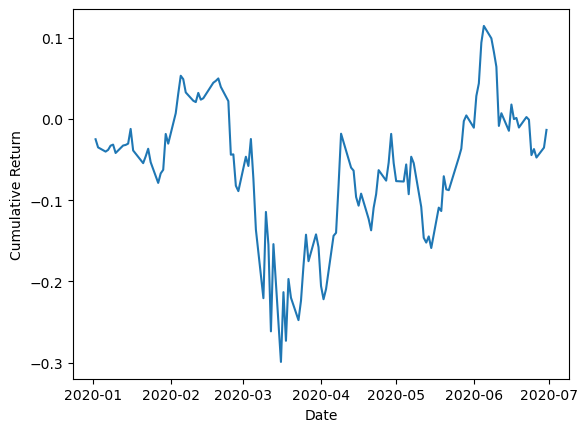

In [56]:
plt.plot(ffdf["Agric"].cumsum())
plt.xlabel("Date")
plt.ylabel("Cumulative Return")

What if I want to plot multiple return series alongside each other?

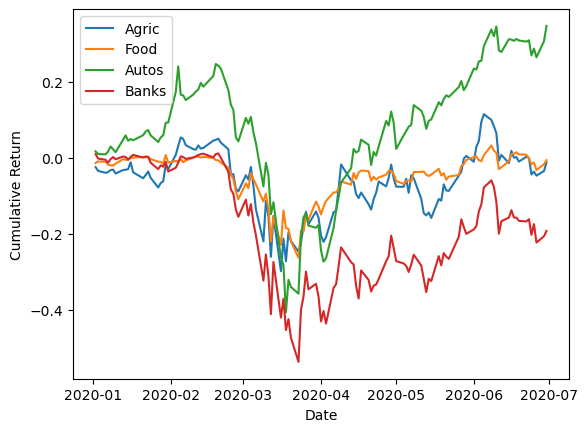

In [57]:
plt.plot(ffdf["Agric"].cumsum(), label="Agric")
plt.plot(ffdf["Food"].cumsum(), label="Food")
plt.plot(ffdf["Autos"].cumsum(), label="Autos")
plt.plot(ffdf["Banks"].cumsum(), label="Banks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()

We only need to specify the column because our index is a date.  I could alternatively, tell matplotlib the `x` and `y` values separately:

Text(0, 0.5, 'Cumulative Return')

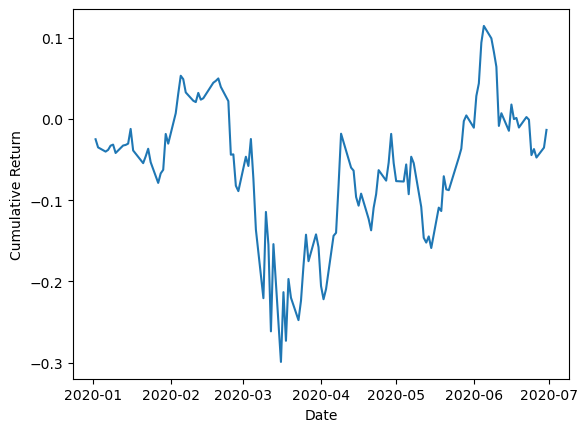

In [58]:
plt.plot(ffdf.index, ffdf["Agric"].cumsum().values)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")

## Scatter Plots

Does "Agric" have any market beta?  Let's look at a scatter plot to get a sense of the correlation:

Text(0, 0.5, 'Agric')

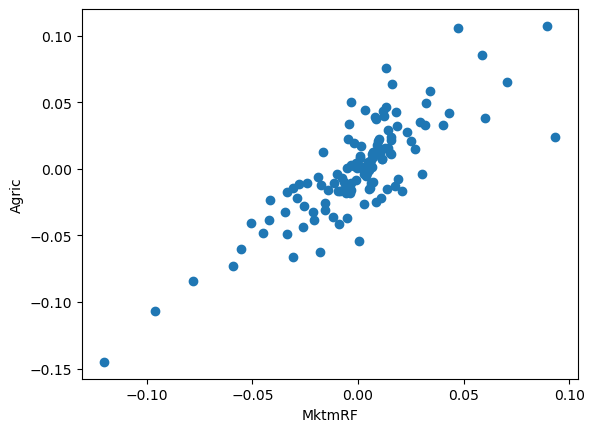

In [59]:
plt.scatter(ffdf["MktmRF"], ffdf["Agric"])
plt.xlabel("MktmRF")
plt.ylabel("Agric")

## Build-In Pandas Plotting

Pandas can also create a number of different plots on its own.

<Axes: >

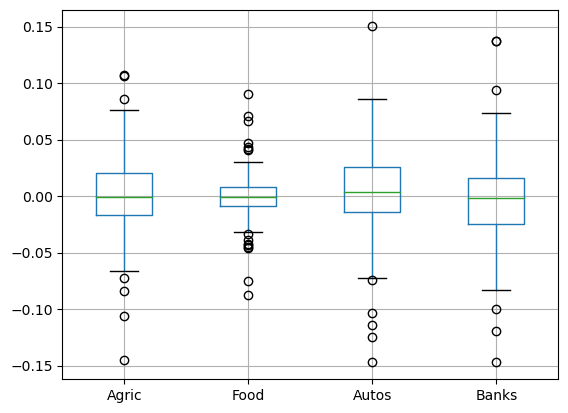

In [60]:
ffdf[["Agric", "Food", "Autos", "Banks"]].boxplot()

array([[<Axes: title={'center': 'Agric'}>,
        <Axes: title={'center': 'Food'}>],
       [<Axes: title={'center': 'Autos'}>,
        <Axes: title={'center': 'Banks'}>]], dtype=object)

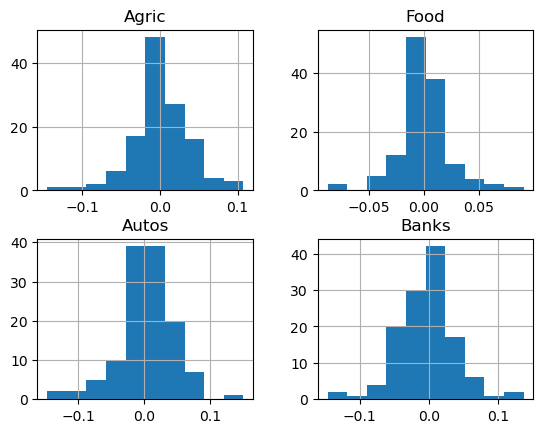

In [61]:
ffdf[["Agric", "Food", "Autos", "Banks"]].hist()

array([[<Axes: xlabel='Agric', ylabel='Agric'>,
        <Axes: xlabel='Food', ylabel='Agric'>,
        <Axes: xlabel='Autos', ylabel='Agric'>,
        <Axes: xlabel='Banks', ylabel='Agric'>,
        <Axes: xlabel='MktmRF', ylabel='Agric'>],
       [<Axes: xlabel='Agric', ylabel='Food'>,
        <Axes: xlabel='Food', ylabel='Food'>,
        <Axes: xlabel='Autos', ylabel='Food'>,
        <Axes: xlabel='Banks', ylabel='Food'>,
        <Axes: xlabel='MktmRF', ylabel='Food'>],
       [<Axes: xlabel='Agric', ylabel='Autos'>,
        <Axes: xlabel='Food', ylabel='Autos'>,
        <Axes: xlabel='Autos', ylabel='Autos'>,
        <Axes: xlabel='Banks', ylabel='Autos'>,
        <Axes: xlabel='MktmRF', ylabel='Autos'>],
       [<Axes: xlabel='Agric', ylabel='Banks'>,
        <Axes: xlabel='Food', ylabel='Banks'>,
        <Axes: xlabel='Autos', ylabel='Banks'>,
        <Axes: xlabel='Banks', ylabel='Banks'>,
        <Axes: xlabel='MktmRF', ylabel='Banks'>],
       [<Axes: xlabel='Agric', ylabel='Mk

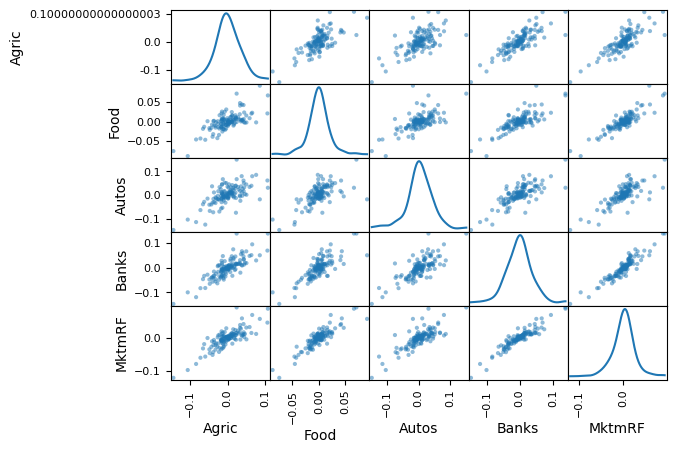

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(ffdf[["Agric", "Food", "Autos", "Banks", "MktmRF"]], diagonal="kde")

A full list of the pandas in-house plotting options are available here:


https://pandas.pydata.org/docs/user_guide/visualization.html

## Heatmaps

Matplotlib is a fairly established library with many useful tools and tricks.  You can spend a considerable amount of time refining your plots to get exactly what you want.  Let me show you one last cool example before we move forward:

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


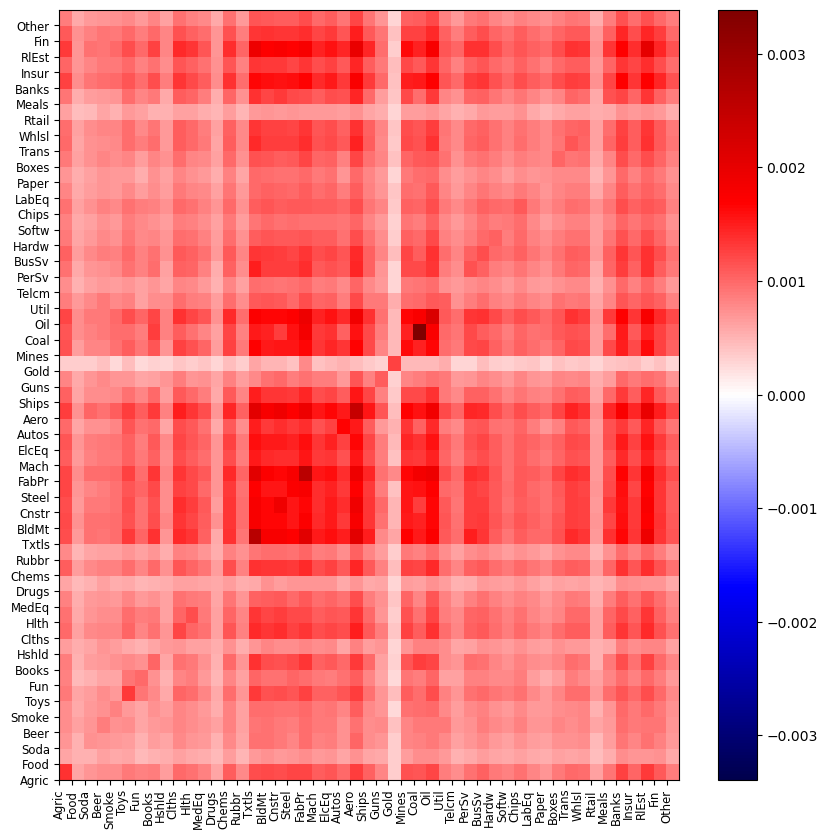

In [64]:
cov = df_ts.cov()
fig, ax = plt.subplots(figsize=(10, 10))
vlim = np.max([np.abs(np.min(cov)), np.max(cov)])
heatmap = ax.pcolor(cov.values, cmap=plt.cm.seismic, vmin=-vlim, vmax=vlim)
ax.set_xticks(np.arange(cov.shape[1]))
ax.set_xticklabels(cov.columns, rotation=90, fontsize="small")
ax.set_yticks(np.arange(cov.shape[1]))
ax.set_yticklabels(cov.index, fontsize="small")
plt.colorbar(heatmap)
plt.show()

# Statsmodels

While plots and descriptive summaries are nice, we often want fuller statistical models to understand asset prices.  There are a number of useful statistical libraries available in Python.  I'm just going to touch on two here and introduce you to methods for accessing more.

The first of these is statsmodels:

https://www.statsmodels.org/stable/index.html

## Regression

Let's fit a regression of our predictor variables on one of our return series:

In [65]:
import statsmodels.formula.api as smf

mod = smf.ols("Agric ~ MktmRF + HML + SMB", data=ffdf)
fit = mod.fit(cov_type='HC3')
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Agric   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     42.24
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           9.49e-19
Time:                        15:30:18   Log-Likelihood:                 310.65
No. Observations:                 125   AIC:                            -613.3
Df Residuals:                     121   BIC:                            -602.0
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.002      0.280      0.780      -0.003       0.004
MktmRF         0.9455      0.105      9.027      0.000       0.740       1.151
HML            0.3508      0.149      2.355      0.019       0.059       0.643
SMB            0.1446      0.394      0.367      0.713      -0.627       0.916
==============================================================================
Omnibus:                        5.927   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                9.197
Skew:                          -0.084   Prob(JB):                       0.0101
Kurtosis:                       4.318   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

# Sklearn

Statsmodels has many rigorous statistical methods, however for more "machine learning" applications, I'd recommend sklearn as a first stop:

https://scikit-learn.org/stable/

## Lasso/Penalized Models

The lasso is a useful tool for high-dimensional data sets.  If I have a large number of possible predictors, many of which have no association with my outcome variable, I can run a lasso to perform selection.  I won't go into the details of how this works but just show an example with our data above:

In [88]:
from sklearn import linear_model

noise = pd.DataFrame(np.random.normal(scale=0.1, size=(ffdf.shape[0], 100)), index=ffdf.index)
noise.columns = noise.columns.map(str)
ldf = ffdf[["Agric", "MktmRF", "HML", "SMB"]].merge(noise, right_index=True, left_index=True)

In [89]:
mod = linear_model.Lasso(alpha=0.00075)
mod.fit(ldf.drop(["Agric"], axis=1), ldf["Agric"])
coef = pd.Series(mod.coef_, index=[c for c in ldf.columns if c != "Agric"])
coef[coef != 0]

MktmRF    0.144299
85       -0.004066
96       -0.001912
dtype: float64

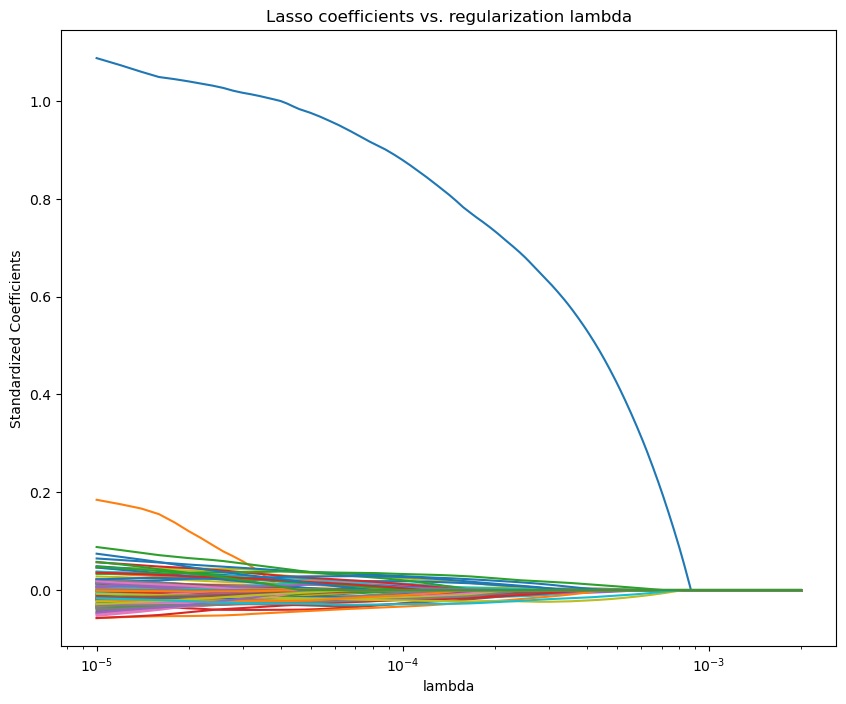

In [112]:
alphas = np.linspace(0.00001,0.002,1000)
lasso = linear_model.Lasso() 
coefs = []

Xs = ldf.drop(["Agric"], axis=1)
y = ldf["Agric"]
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xs, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10,8))    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients vs. regularization lambda');

# Other Libraries and Beyond

I've only touched on the very basics of what's possible in Python.  There are many other specialized libraries out there containing various useful functions.  As you explore these you'll want to get familiar with your package manager -- a tool for installing modules/libraries.

If you used Anaconda, you should be able to install packages by running:

`conda install <package>`

where `<package>` is the name of the library.  Otherwise one of the standard package manager in Python is pip:

`pip install <package>`.

In either case you can check out the document for more on this here:

https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/

https://pip.pypa.io/en/stable/reference/pip_install/